In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(df.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


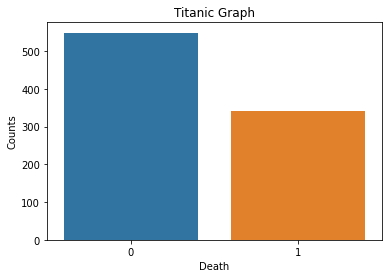

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Titanic Graph")
plt.xlabel("Death")
plt.ylabel('Counts')
plt.show()

In [ ]:
df = df.drop(df.columns[[0,3, 8,10, -1]], axis=1)

In [ ]:
df.Sex.replace(['male','female'],[1,0], inplace = True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [ ]:
df.dropna(subset=df.columns, inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [ ]:
import numpy as np
df1 = df.to_numpy()
df1

array([[ 0.    ,  3.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [ ]:


x =  df1[:,1:]
y = df1[:,0]

import collections
collections.Counter(y)

Counter({0.0: 424, 1.0: 290})

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 [ 1.      0.     35.      1.      0.     53.1   ]
 [ 3.      1.     35.      0.      0.      8.05  ]
 [ 1.      1.     54.      0.      0.     51.8625]
 [ 3.      1.      2.      3.      1.     21.075 ]
 [ 3.      0.     27.      0.      2.     11.1333]
 [ 2.      0.     14.      1.      0.     30.0708]
 [ 3.      0.      4.      1.      1.     16.7   ]]
y = [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


In [ ]:
# ora contiamo le classi che sono presenti nella y per vedere se corrispondono a quanto trovato nel dataframe
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.05, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((71, 6), (71,), (643, 6), (643,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 1.      0.     17.      1.      0.     57.    ]
 [ 1.      1.     35.      0.      0.     26.2875]
 [ 2.      0.     28.      1.      0.     26.    ]
 [ 1.      1.     42.      1.      0.     52.    ]
 [ 3.      1.     34.      0.      0.      8.05  ]
 [ 3.      1.     19.      0.      0.      6.75  ]
 [ 3.      1.      1.      1.      2.     20.575 ]
 [ 1.      0.     54.      1.      0.     59.4   ]
 [ 2.      1.     18.      0.      0.     13.    ]
 [ 3.      1.     28.5     0.      0.      7.2292]]
y_train = [1. 1. 1. 0. 0. 0. 1. 1. 0. 0.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=90)
# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
dati reali presenti nel dataset di test = [1. 0. 0. 1. 0. 1. 0. 1. 1. 1.]


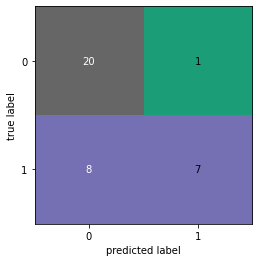

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.71      0.95      0.82        21
         1.0       0.88      0.47      0.61        15

    accuracy                           0.75        36
   macro avg       0.79      0.71      0.71        36
weighted avg       0.78      0.75      0.73        36

